## Walmart Sales Analysis


Data cleaning and processing


In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime 
import matplotlib.ticker as mticker
import calendar

pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('dark_background')

In [127]:
#Reading the data 
data = pd.read_csv('Walmart_Sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [128]:
#Converting to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Sales According to Years


C:\Users\dahot\AppData\Local\Temp\ipykernel_17724\350356565.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().reset_index()


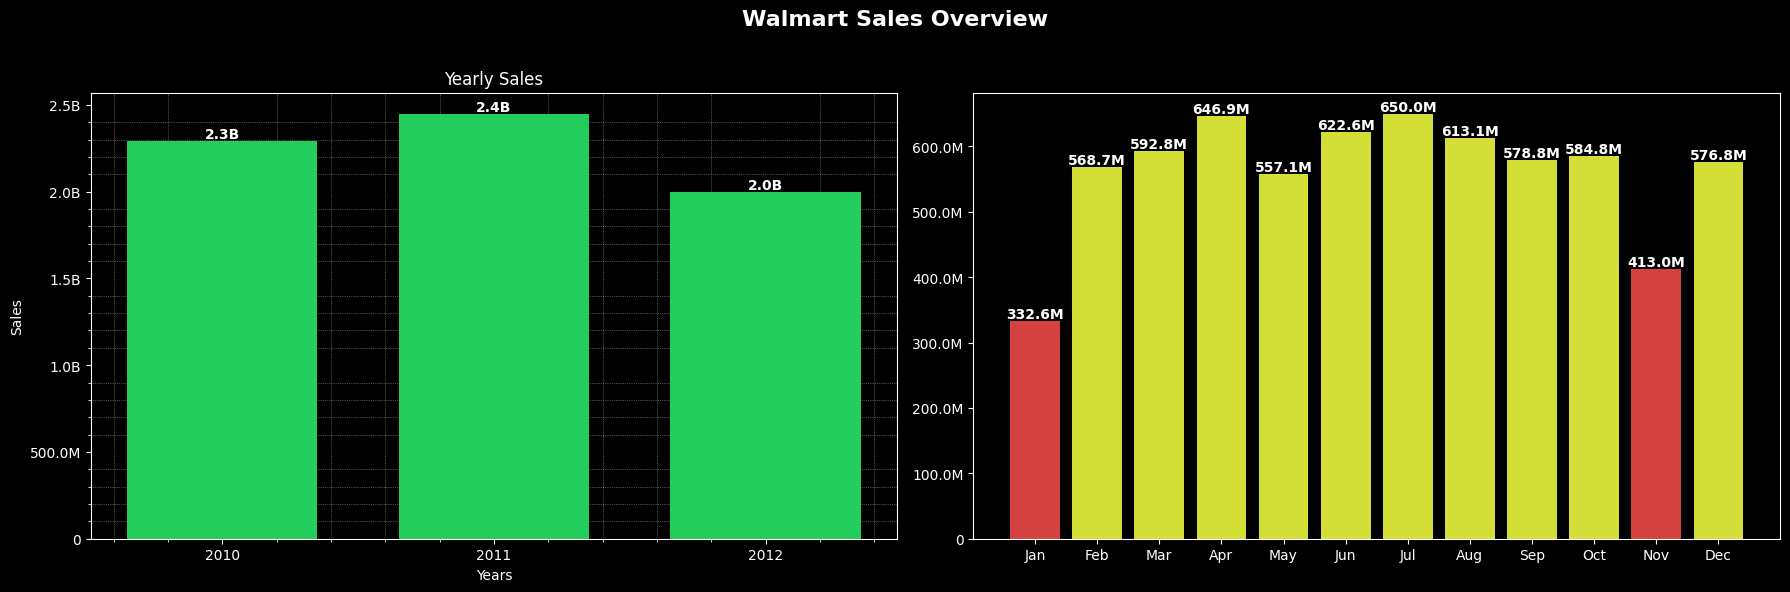

In [129]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.strftime('%b')

month_order = list(calendar.month_abbr)[1:]
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

yearly_sales = data.groupby('Year')['Weekly_Sales'].sum().reset_index()
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(18,6))

year_plot = ax[0]
month_plot = ax[1]

def human_format(num):
    if num >= 1e9:
        return f'{num/1e9:.1f}B'
    elif num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}K'
    else:
        return str(int(num))

bars = year_plot.bar(yearly_sales['Year'],
              yearly_sales['Weekly_Sales'],
              color="#23CD5B",
              zorder=2,
              width=0.7)

# Step 2: Format Y-axis ticks
year_plot.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))
month_plot.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))

bar_colors = ["#D54141" if val < 500_000_000 else "#D3DE36" for val in monthly_sales['Weekly_Sales']]

for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    year_plot.text(
        x, height + 0.02,
        human_format(height),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color="#FFFFFF",
    )

year_plot.set_title('Yearly Sales')
year_plot.set_xlabel('Years')
year_plot.set_ylabel('Sales')
year_plot.set_xticks(yearly_sales['Year'])
year_plot.minorticks_on()
year_plot.grid(which='minor', linestyle=':' , linewidth='0.5', alpha=0.6, zorder=1)

month_bars = month_plot.bar(monthly_sales['Month'],
           monthly_sales['Weekly_Sales'],
           color=bar_colors)

for bar in month_bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    month_plot.text(
        x, height + 0.02,
        human_format(height),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color="#FFFFFF",
    )

fig.suptitle("Walmart Sales Overview\n" + "", 
             fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()